In [306]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

\begin{equation*}
\theta := \theta - \eta\nabla J(\theta)
\end{equation*}

\begin{equation*}
J(\theta) = \frac{1}{2m}\lvert\lvert X\theta - Y \lvert\lvert^2 + \frac{\lambda}{2m}\theta^T\theta
\end{equation*}

\begin{equation*}
\nabla J(\theta) = X^T(X\theta - Y) + \frac{\lambda}{m}\theta
\end{equation*}

In [495]:
class SGDRegressor:
    def __init__(self, fit_intercept=True, normalize=False, lam=0.005, batch_size=100, max_iter=2000,
                 alpha = 0.002):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.lam = lam
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.alpha = alpha
        
    def _add_intercept(self, X):
        """
        Function is responsible for adding intercept to features.
        
        Parameters
        ----------
        X : DataFrame
            Features
            
        Returns
        -------
        DataFrame
            Features with ones in the first column.
        """
        intercept = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((intercept, X), axis=1)
        return X
            
    def _compute_loss(self):
        m = self.X.shape[0]
        h = np.dot(self.X, self.theta)
        loss =np.sum((h - y) ** 2) / (2 * m)
        return loss
    
    def _compute_hypothesis(self, X, theta):
        return np.dot(X, theta)
    
    def _get_regularisation(self, theta, m):
        return self.lam / m * theta
            
    def _descend_gradient(self, X, Y, alpha, num_iter):
        m = X.shape[0]
        num_features = X.shape[1]
        theta = np.zeros((num_features, 1))
        self.errors = []
        for i in range(num_iter):
            h = self._compute_hypothesis(X, theta)
            error = h - Y
            temp_X = np.dot(error.T, X)
            reg_term = self._get_regularisation(theta, m)
            theta = theta - alpha  * (temp_X.T / m + reg_term)
            self.errors.append(error)
        return theta

    def fit(self, X, Y):
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        m = X.shape[0]
        num_features = X.shape[1]
        theta = np.zeros((num_features, 1))
        self.theta_list = []
        self.errors = []
        for _ in range(self.max_iter):
            inds = np.random.permutation(m)[:self.batch_size]
            batch_X = X
            batch_Y = Y
            h = self._compute_hypothesis(batch_X, theta)
            error = h - batch_Y
            temp_X = np.dot(error.T, batch_X)
            reg_term = self._get_regularisation(theta, m)
            theta = theta - self.alpha  * (temp_X.T / m + reg_term)
            self.theta_list.append(theta)
            self.errors.append(np.sqrt((error.T@error) / error.shape[0]).flatten()[0])
        self.theta = theta
    
    def predict(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        return np.dot(X, self.theta)

In [496]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(load_diabetes()['data'], columns=load_diabetes()['feature_names'])
df['target'] = load_diabetes()['target']
X = df['bmi'].values
Y = df['target'].values

X = StandardScaler().fit_transform(X.reshape(-1,1))

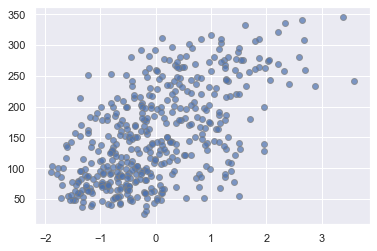

In [497]:
plt.scatter(X, Y, edgecolor='grey', alpha=0.7)

In [498]:
model = SGDRegressor()
model.fit(X, Y.reshape(-1, 1))
y_pred = model.predict(X)

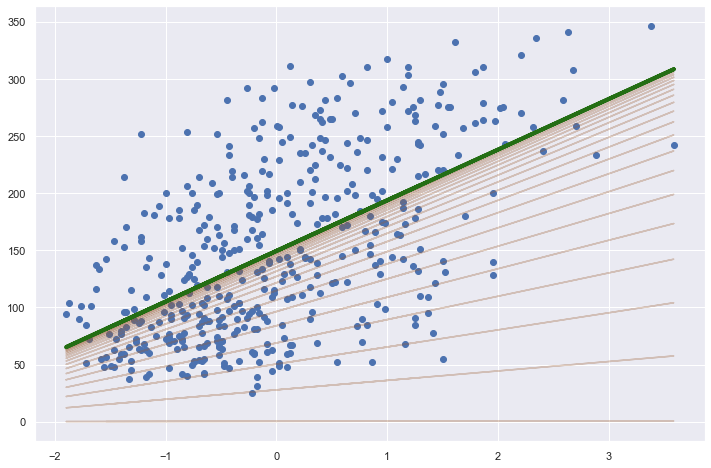

In [499]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, Y)
for theta in model.theta_list[::100]:
    intercept = np.ones(X.shape[0]).reshape(-1, 1)
    X_with_intercept = np.concatenate((intercept, X), axis=1)
    result = np.dot(X_with_intercept, theta)
    ax.plot(X, result, c='#995a2c', alpha=0.3)

ax.plot(X, y_pred, linewidth=4, c='#246e14');

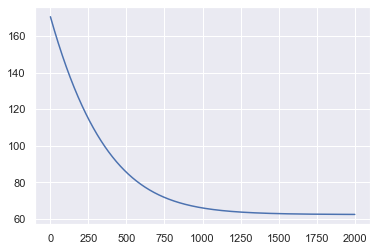

In [500]:
num = len(model.errors)
num_iters = np.linspace(1, num, num)

plt.plot(num_iters, model.errors)